**Module Code:** CS4S771

**Module Title:** Machine Learning and Autonomous Systems

**Assessment Title:** Medical Image Classification

**Student Name:** Salma Javid

**Enrollment ID:** 30107961

#Testing Machine Learning Models for the classification of Breast Cancer Dataset
This assignment attempts to address the classification of breast tissue mass image data using different machine learning techniques. The data comprises of features (real value Mean, Standard error and "worst" or largest value) derived from digitized images of fine needle aspirations of a breast tissue mass, including measurements related to radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension computed for each cell nucleus.

**The objective** is to develop a model for accurately distinguishing between malignant (M) and benign (B) cases.

# #1. Importing Libraries

In [ ]:
#First, let’s import the libraries required for our use. We will be doing this as and when required.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# #2. Loading The Dataset

In [ ]:
#Now let's load the dataset from Google Drive
breast_cancer_dataset = pd.read_csv('/content/drive/MyDrive/MSc_in_AI/Machine_Learning/breast-cancer-wisconsin.csv')

# #3. Inspecting The Dataset

#— Knowing the Shape
Now let's find out the total number of rows and columns in the dataset.

In [ ]:
breast_cancer_dataset.shape

(569, 33)

#— Knowing the Column/Feature length
Now let's find out the total number of features [columns] in the dataset.

In [ ]:
len(breast_cancer_dataset.columns)

33

**Listing out the names of all the columns in the dataset**

In [ ]:
breast_cancer_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Result:** This result shows an "Unnamed: 32" column which actually doesn't exist in the dataset (though showing in the DataFrame). Let me DROP it.

In [ ]:
breast_cancer_dataset = breast_cancer_dataset.drop('Unnamed: 32', axis=1)


Now let's check the names of columns again to verify if the "Unnamed:32" column is dropped or not

In [ ]:
breast_cancer_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Success! It is dropped.**

#— Knowing the Row/Record Length
Finding the total number of records/rows in the dataset.

In [ ]:
len(breast_cancer_dataset)

569

**Finding the size of the dataset**

In [ ]:
breast_cancer_dataset.size

18208

#— The Head
Printing the first 5 records from the dataframe.

In [ ]:
breast_cancer_dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

#— The Tail
Printing the last 5 records now.

In [ ]:
breast_cancer_dataset.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

**Let's get the description of our dataframe/database**

In [ ]:
# Using describe() to generate descriptive statistics for our DataFrame.
breast_cancer_dataset.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

**Let's check the information of our dataframe/database**

In [ ]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#— Finding Unique Values in Target Feature
Let's find out the unique values from the 'Diagnosis' column/feature.

In [ ]:
breast_cancer_dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# #4. Data Visualization

#— Pie Chart

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=['Benign','Malignant'], values=breast_cancer_dataset['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=21,
                  marker=dict(colors=['mediumturquoise', 'red'], line=dict(color='#000000', width=2)))
fig.show()

#— Count plot

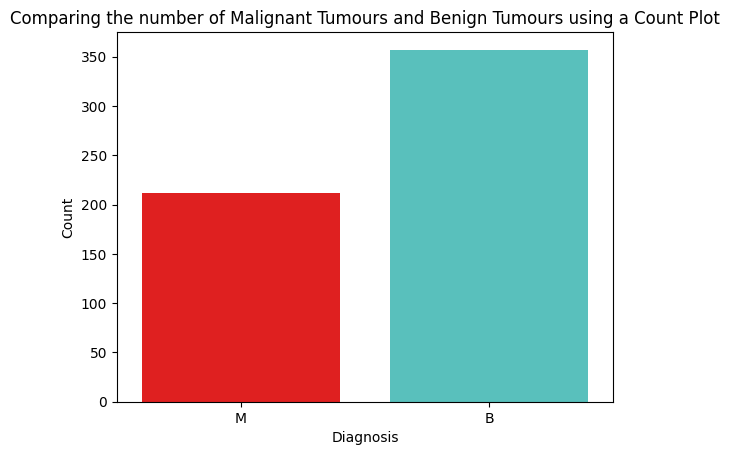

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=breast_cancer_dataset, palette={'B': 'mediumturquoise', 'M': 'red'})
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Comparing the number of Malignant Tumours and Benign Tumours using a Count Plot')
plt.show()



# — Creating Scatterplots

Let me now create a matrix of scatterplots, where each of the shortlisted features related to the worst values of certain characteristics, such as area, texture, radius, etc., as well as the 'diagnosis' (our target feature) column. This way we can visualize the relationships between multiple variables and identify patterns or trends.

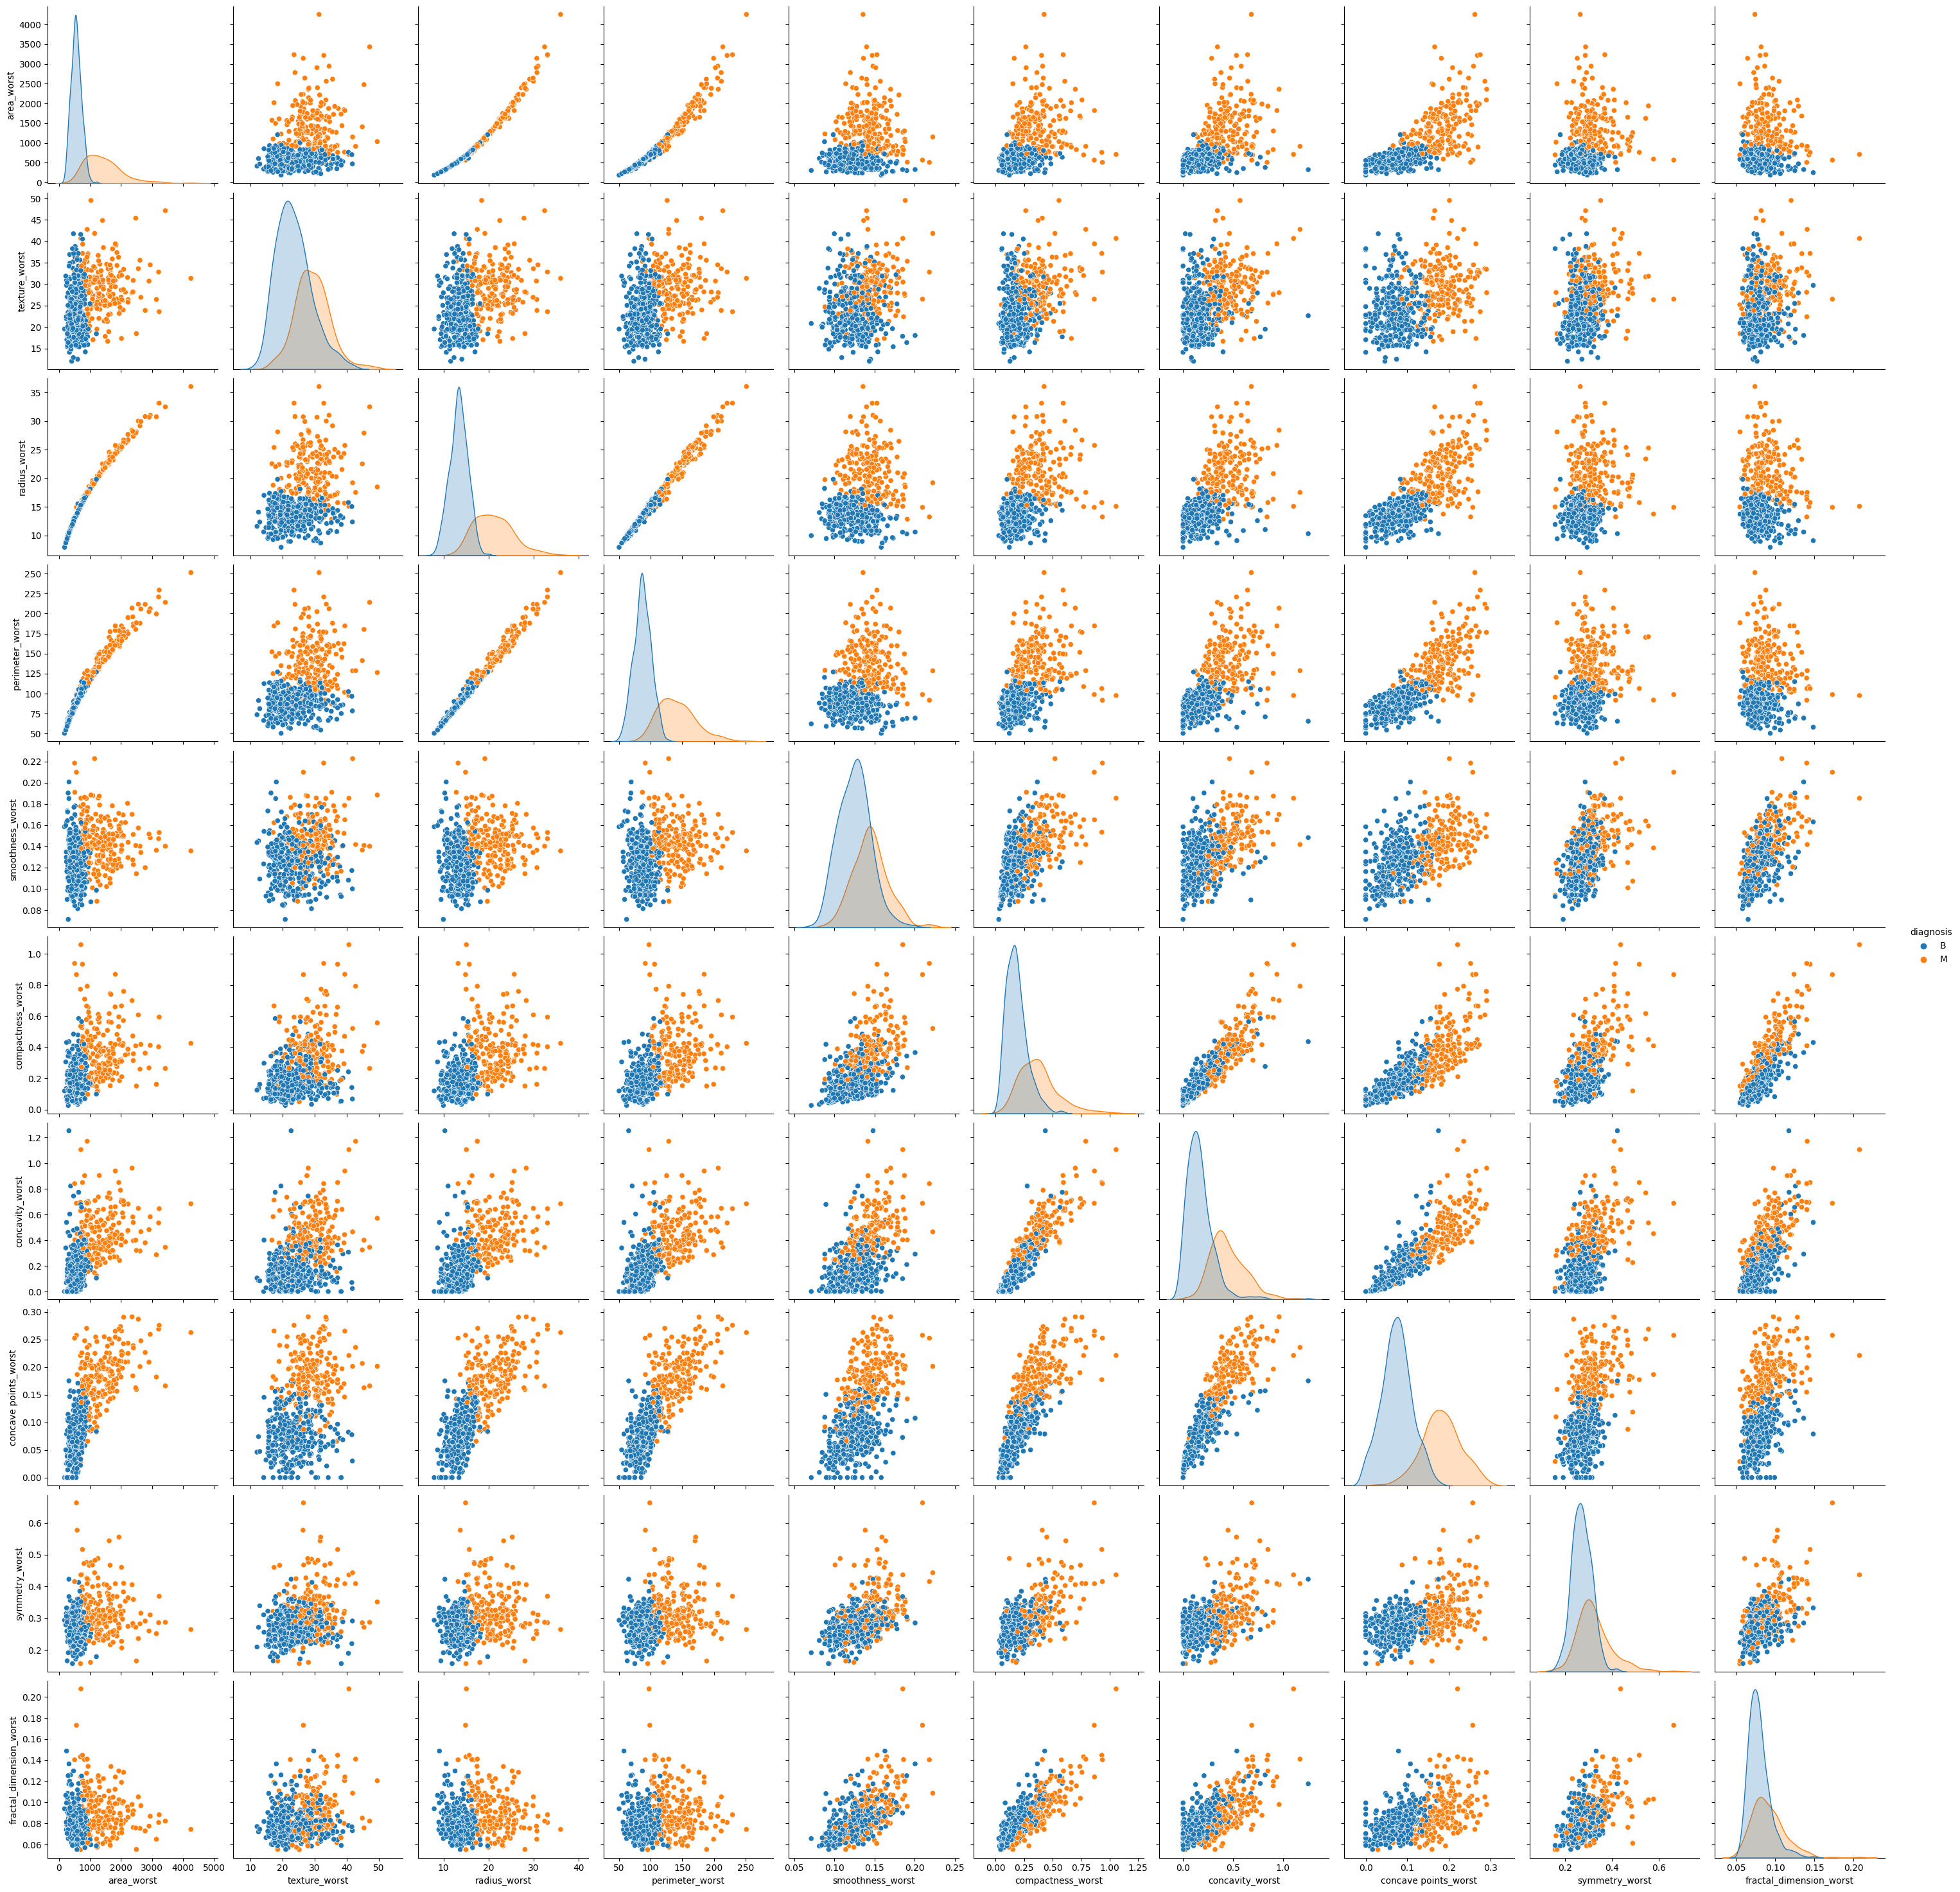

In [ ]:
import seaborn as sns
import pandas as pd
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis'].astype('category')
sns.pairplot(breast_cancer_dataset[['area_worst', 'texture_worst', 'radius_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']], hue='diagnosis', height=3, aspect=1)


# #5. Data Preprocessing
Checking if there are any missing values in our dataframe

In [ ]:
breast_cancer_dataset.isnull()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...         False          False            False       False   
1    ...         False          False            False       False   
2    ...         False          False            False       False   
3    ...         False          False            False       False   
4    ...         False          False            False       False   
..   ...           ...            ...              ...         ...   
564  ...         False          False            False       False   
565  ...         False          False            False       False   
566  ...         False          False            False       False   
567  ...         False          False            False       False   
568  ...         False          False            False       False   

     smoothness_worst  compactness_worst  concavity_worst  \
0               False              False            False   
1               False              False            False   
2               False              False            False   
3               False              False            False   
4               False              False            False   
..                ...                ...              ...   
564             False              False            False   
565             False              False            False   
566             False              False            False   
567             False              False            False   
568             False              False            False   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   False           False                    False  
1                   False           False                    False  
2                   False           False                    False  
3                   False           False                    False  
4                   False           False                    False  
..                    ...             ...                      ...  
564                 False           False            

It is hard to see the whole dataframe using the above method, so now using it along with the sum() method to understand it better.

**Checking if there are any missing values in our dataframe (again)**

In [ ]:
breast_cancer_dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Result:** There are no missing values in our dataset.

# #6. Feature Engineering
Feature engineering transforms raw data into a format suitable  for machine learning algorithms. It involves creating new features or modifying existing ones to enhance the performance of a machine learning model because effective feature engineering can significantly impact the success of a model, often leading to improved accuracy, robustness, and interpretability.

#— Feature Mapping
I am using this technique to convert M (for Malignnant) and B (for Benign) of the 'Diagnosis' column into binary numbers. Our ML models can better understand numbers so this will help with data analysis/classification.

In [ ]:
# catogorical column - Diagnosis (M = malignant = 1 , B = benign = 0)
#breast_cancer_dataset['diagnosis']=breast_cancer_dataset['diagnosis'].map({"M":1,"B":0})
breast_cancer_dataset['diagnosis'].replace({'M':1, 'B':0},inplace=True)

After feature mapping, now let's use the head and tail methods again to check if the diagnosis feature is converted to binary variables or not.

In [ ]:
breast_cancer_dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         1        17.99         10.38          122.80     1001.0   
1    842517         1        20.57         17.77          132.90     1326.0   
2  84300903         1        19.69         21.25          130.00     1203.0   
3  84348301         1        11.42         20.38           77.58      386.1   
4  84358402         1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

**Success! Now our diagnosis feature has binary values.**

In [ ]:
#Now let's check the last 5 rows using tail() method.
breast_cancer_dataset.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         1        21.56         22.39          142.00     1479.0   
565  926682         1        20.13         28.25          131.20     1261.0   
566  926954         1        16.60         28.08          108.30      858.1   
567  927241         1        20.60         29.33          140.10     1265.0   
568   92751         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

#— Feature Selection

I have selected the "worst" or largest value of the given 10 features computed for each cell nucleus in the breast cancer dataset. It is based on my understanding that the worst-case scenario might be more indicative of the underlying pathology or severity of the condition being studied.

**My reasons:**

**Clinical Relevance:** In medical contexts, the "worst" or largest values may represent the most severe or aggressive characteristics of the cell nuclei. For conditions like cancer, identifying the worst-case scenario can be crucial for prognosis and treatment decisions.

**Pathological Significance:** The "worst" values might be more indicative of pathological abnormalities or malignant behavior in the cells. Features computed based on the largest values may capture abnormalities that are clinically significant.

**Risk Assessment:** For risk assessment and predicting the likelihood of malignancy, focusing on the worst-case scenario can provide a more conservative estimate. It helps identify cases that may have a higher risk of progression or recurrence.

**Decision-Making in Treatment:** When making treatment decisions, clinicians may prioritize information about the most aggressive features. The "worst" values may guide decisions on the intensity and type of treatment required.

Therefore they seem the most relevant of each feature for the classification task at hand.

#— A Histogram for Finalized Features

This visualization can be useful for gaining insights into the distribution of individual features in the dataset, such as identifying skewed distributions, detecting outliers, or understanding the spread of values.

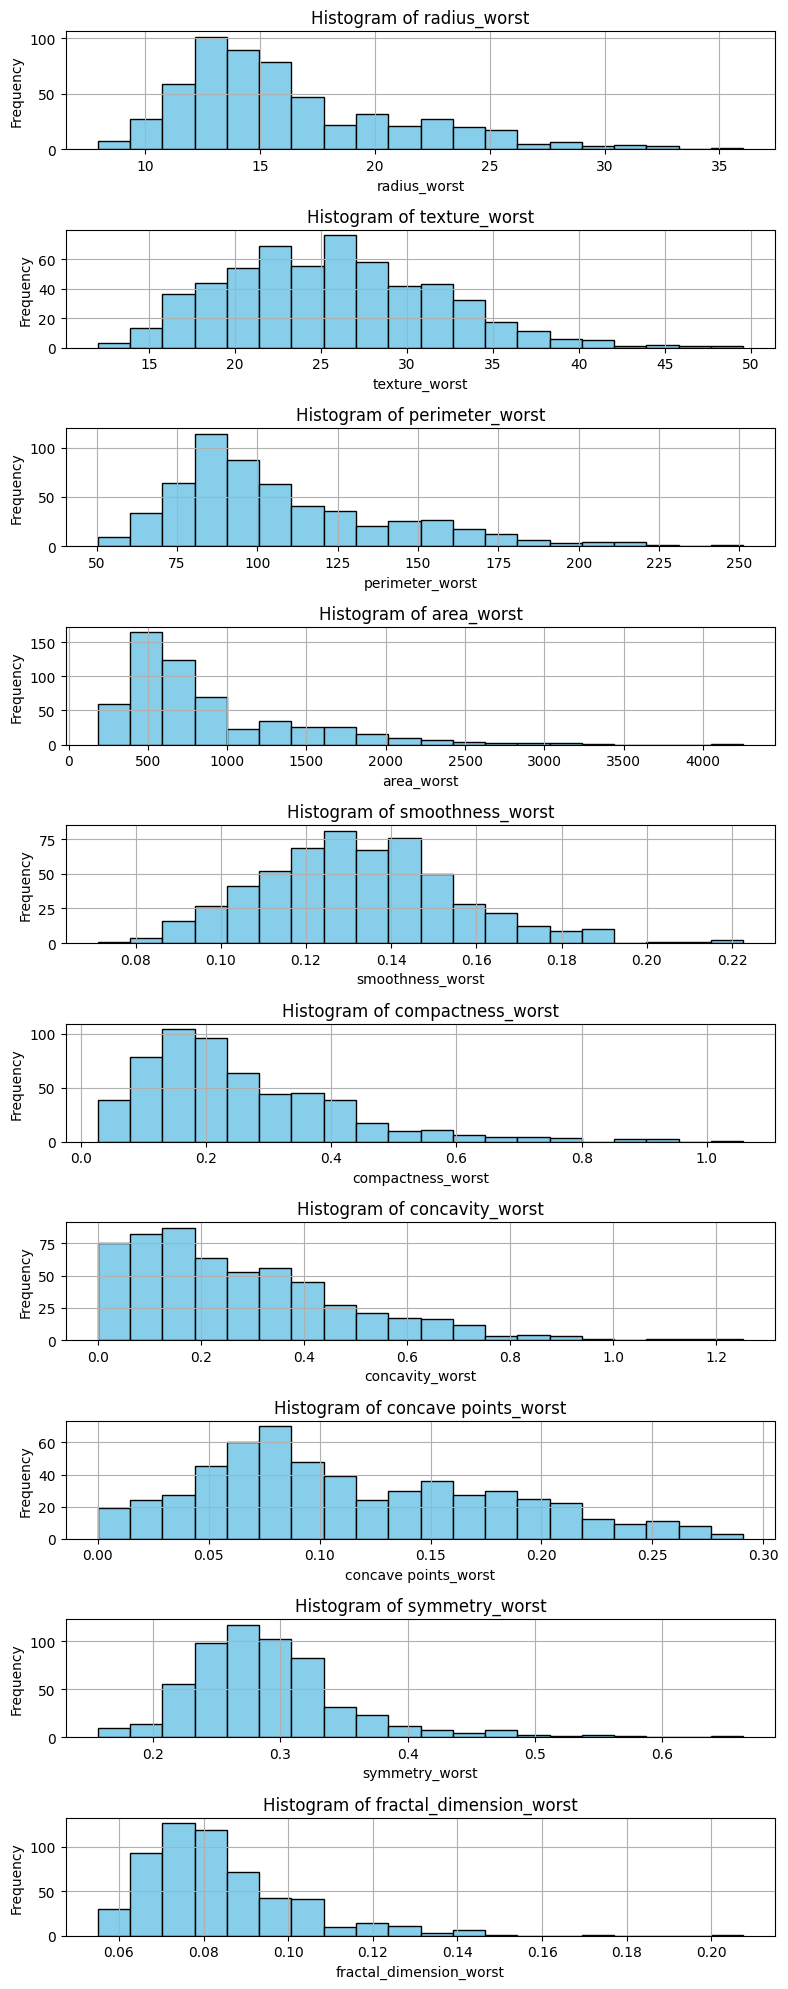

In [ ]:
import matplotlib.pyplot as plt

shortlisted_features = ["radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

# Creating subplots
fig, axes = plt.subplots(nrows=len(shortlisted_features), ncols=1, figsize=(8, 2 * len(shortlisted_features)))

# Plotting histograms for each shortlisted feature
for i, feature in enumerate(shortlisted_features):
    ax = axes[i]
    breast_cancer_dataset[feature].hist(ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjusting layouts to prevent overlap of subplots
plt.tight_layout()

# Showing the plot
plt.show()


#— Tracking Outliers

<ipython-input-24-b00ae67a121f>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

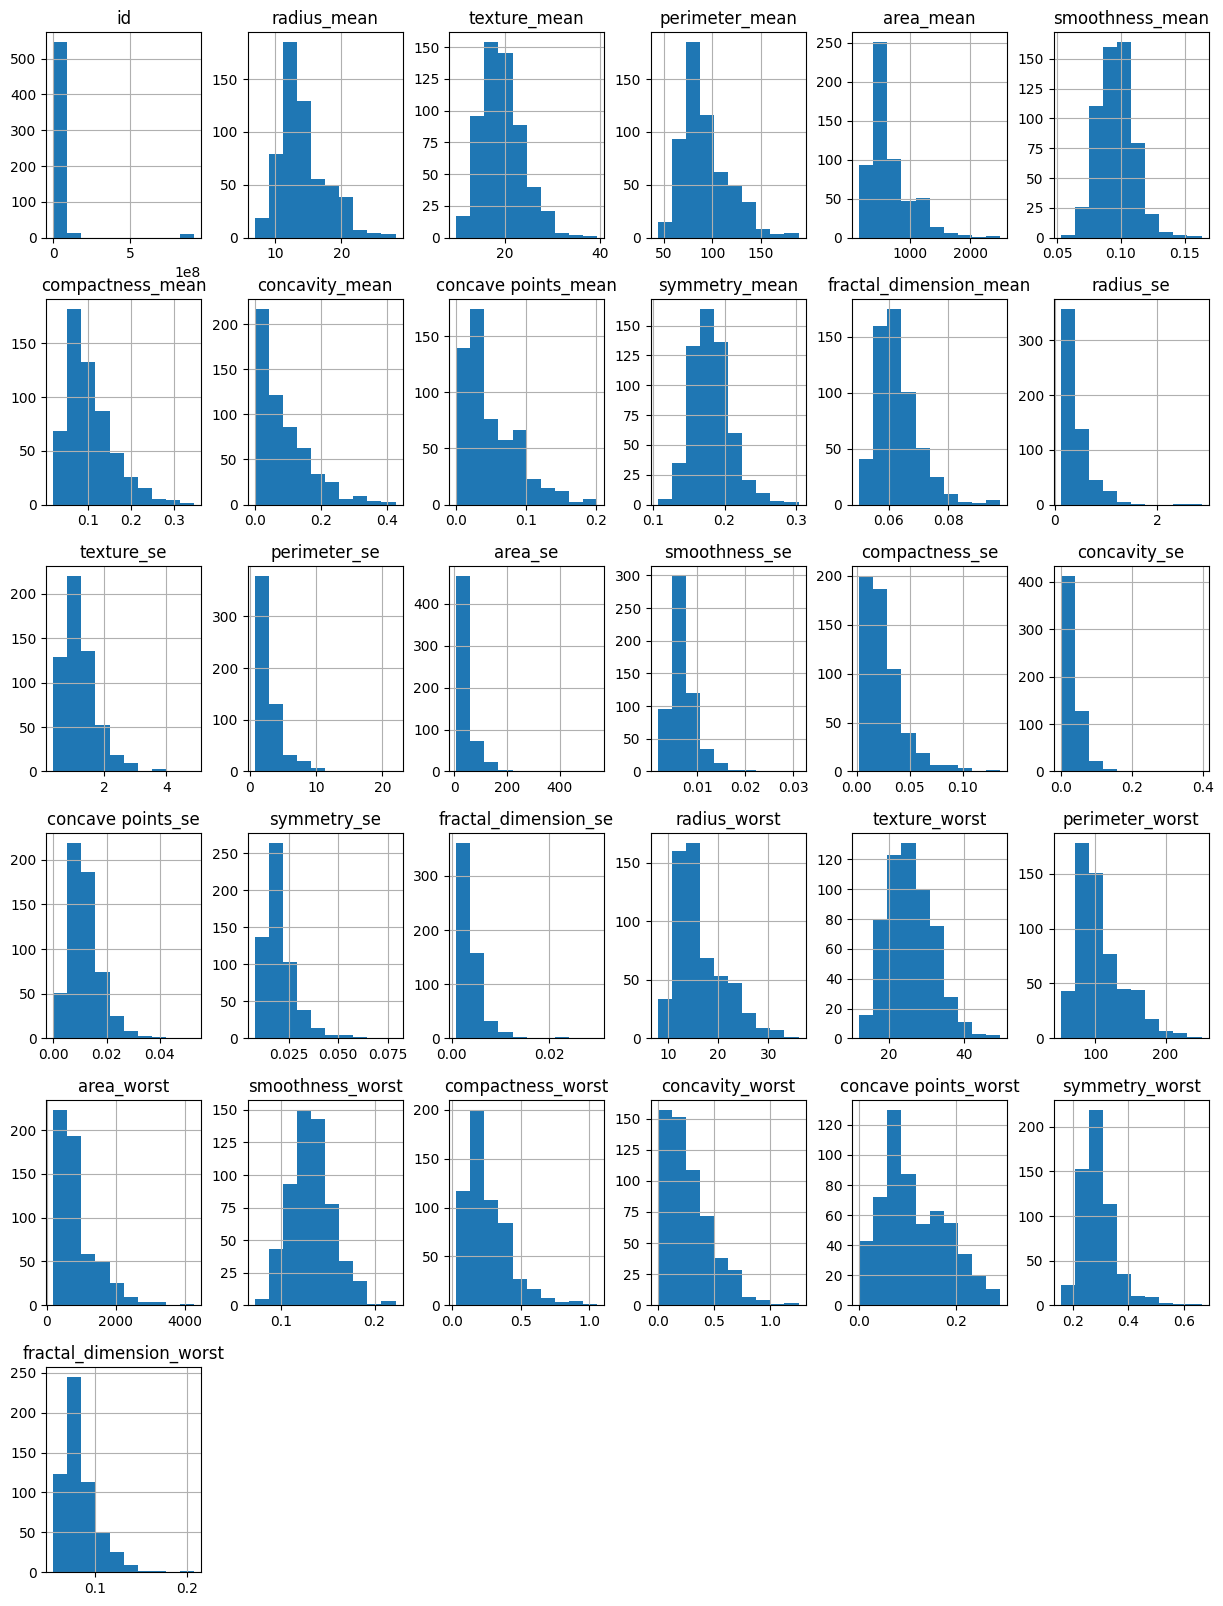

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
breast_cancer_dataset.hist(ax = ax)



**Seems no outliers, great!**

#— Feature Scaling
 Now let's apply "Feature scaling" on our dataFrame. It is a preprocessing technique used to standardize or normalize independent variables (features) of a dataset. Real-world datasets such as ours, the breast cancer database, usually contains features of varying degrees. For our ML model/algorithm to interpret accurately these features need to be on the same scale/range. This is why we need to perform feature scaling.

In [ ]:
import pandas as pd
import numpy as np

def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

X = breast_cancer_dataset.values
X_scaled = feature_scaling(X)
breast_cancer_dataset_scaled = pd.DataFrame(data=X_scaled, columns=breast_cancer_dataset.columns)
breast_cancer_dataset=breast_cancer_dataset_scaled

# #7. Train-Test Split
I am splitting my data into training and testing sets in the ratio of 70:30... where 70 is the percentage of training set, and 30 is of the testing set.


In [ ]:
#Importing the module required for the split
from sklearn.model_selection import train_test_split

# Splitting the dataset
x = breast_cancer_dataset.drop('diagnosis', axis=1)
y = breast_cancer_dataset['diagnosis']

# Splitting the variables with an 70-30 ratio and a random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

#Checking the shape of the results
print("Training set - Feature Length (x, y): ", x_train.shape, "diagnosis: ", y_train.shape)
print("Test set - Feature Length  (x, y): ", x_test.shape, "diagnosis: ",y_test.shape)

Training set - Feature Length (x, y):  (398, 32) diagnosis:  (398,)
Test set - Feature Length  (x, y):  (171, 32) diagnosis:  (171,)


# #8. Correlation Matrix

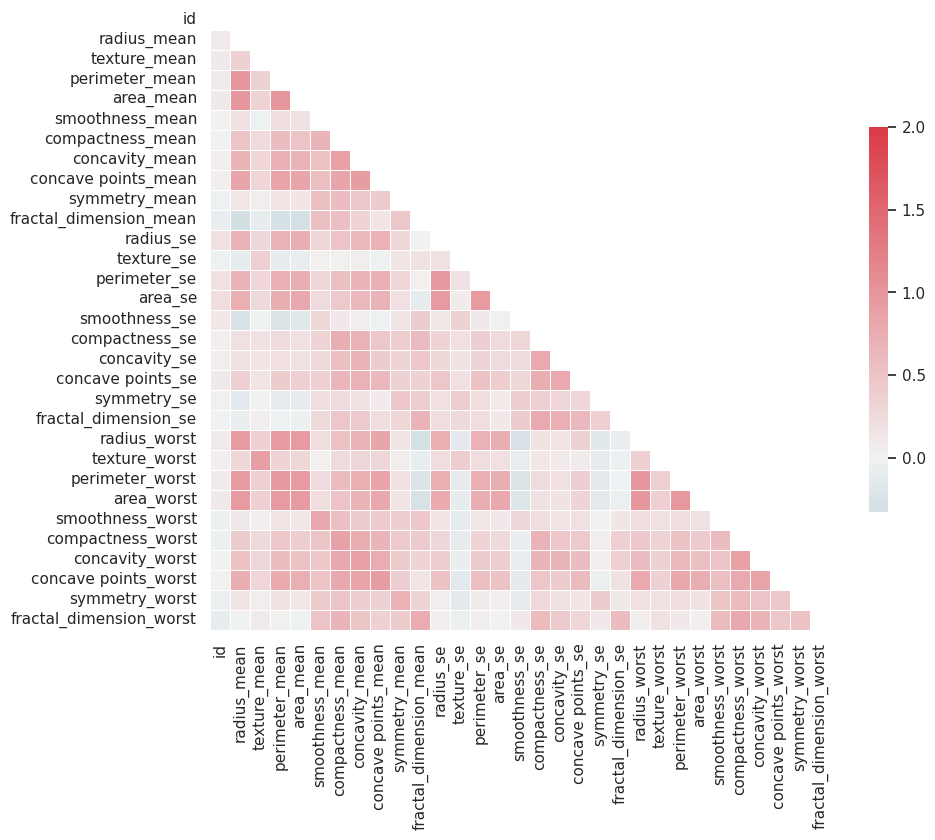

In [ ]:
sns.set(style="white")
# The correlation matrix
corr = x_train.corr()
#Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
#Generating a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

**Colors:** Each cell in the heatmap represents the correlation between two features, with color indicating the strength and direction of the relationship. Blue colors represent negative correlations (features move in opposite directions), red represents positive correlations (features move in the same direction), and white indicates no correlation. The deeper the shade of blue or red, the stronger the correlation.

**Axes:** Each axis of the heatmap corresponds to a feature in the dataset.

**Based on the heatmap, here are some observations:**

**Strong positive correlations:** There appear to be several strong positive correlations, represented by dark red squares.

**Strong negative correlations:** There are also some strong negative correlations, represented by dark blue squares.

**Weaker correlations:** The majority of the squares are light in color, indicating weaker correlations between features. These features may still be informative for the model, but their individual influence might be less significant.

**In this project, I am using the following Machine Learning algorithms:**

1. Linear Regression

2. Decision Tree Classifier

3. Logistic Regression

4. Convolutional Neural Network

# #9. Testing Algorithm #1 - Linear Regression

**Visualizing the dataframe** by creating a scatter plot with a linear regression line for one of the finalized features.

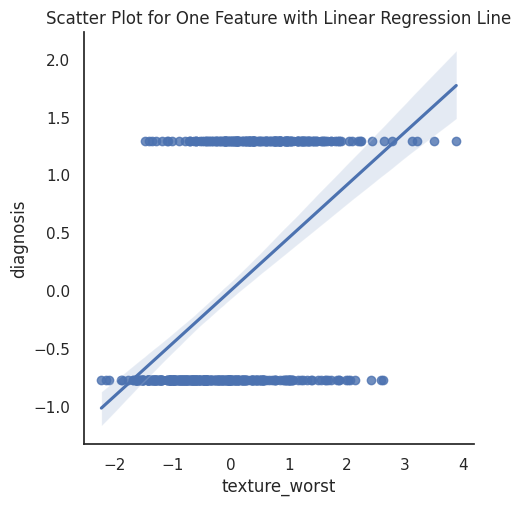

In [ ]:
from sklearn import linear_model
import seaborn as sns
import pandas as pd
sns.lmplot(x='texture_worst', y='diagnosis', data=breast_cancer_dataset)
plt.title('Scatter Plot for One Feature with Linear Regression Line')
plt.show()

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(breast_cancer_dataset[['diagnosis']], breast_cancer_dataset['area_worst'])

LinearRegression()

Now our module has been trained, it's time to test it - To get the predictions

In [ ]:
reg.predict([[1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([0.73382503])

In [ ]:
reg.predict([[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([-3.66547661e-17])

**Conclusion:** The Linear Regression (single variable) algorithm serves as a statistical tool for predictive analysis, primarily applied to continuous variables like cost, age, temperature, etc. However, it is not well-suited for our specific database due to the nature of our target variable, "diagnosis," which consists of binary values.

**Reasoning & Conclusion:** The unsuitability arises from the fact that the best fit line of the Linear Regression model touches only two points out of a total of 569 in our dataset. Consequently, the error rate is anticipated to be high, leading to inaccurate predictions. Linear Regression is more effective when the relationship between variables is linear, and in our case, with binary values for the target variable, the data points exhibit a non-linear pattern. Hence, a linear regression model is not an appropriate choice for this dataset.

**Polynomial regression** is again a technique, primarily used for predicting continuous numerical values. It is not suitable for binary classification tasks, as our current case of breast tumor classification (Malignant or Benign).

# #10. Testing Algorithm #2 — Decision Tree Classification

**Decision Tree Classification** is a supervised machine learning algorithm used for both classification and regression tasks. These are powerful and interpretable models that make decisions by recursively splitting the data based on the most informative features. Also, it offers a transparent and intuitive approach to solving classification problems. It builds a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a class label.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini")
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
classifier.predict(x_test)

array(['M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M'], dtype=object)

In [ ]:
print(x_test)

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
27     852781        18.61         20.25          122.10     1094.0   
142    869218        11.43         17.31           73.66      398.0   
419    906290        11.16         21.41           70.95      380.3   
495    914333        14.87         20.21           96.12      680.9   
472    911384        14.92         14.93           96.45      686.9   
..        ...          ...           ...             ...        ...   
259  88725602        15.53         33.56          103.70      744.9   
533  91930402        20.47         20.67          134.70     1299.0   
306     89344        13.20         15.82           84.07      537.3   
291      8915        14.96         19.10           97.03      687.3   
372   9012795        21.37         15.10          141.30     1386.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
27           0.09440           0.10660        0.149000             0

In [ ]:
classifier.score(x_test, y_test)

0.9181286549707602

Accuracy score is a measure of the overall correctness of the model's predictions on the test set. 91.81% (a higher accuracy) suggests that the decision tree classifier correctly predicted the class labels for approximately 91.81% of the samples in the test set.

While accuracy is a common and intuitive metric, it may not provide a complete picture, especially in imbalanced datasets. Additional metrics like precision, recall, F1-score, or a confusion matrix might be needed for a more comprehensive evaluation of the model's performance.

[Text(0.5625, 0.9285714285714286, 'x[23] <= 106.2\ngini = 0.465\nsamples = 398\nvalue = [252, 146]'),
 Text(0.375, 0.7857142857142857, 'x[28] <= 0.181\ngini = 0.085\nsamples = 248\nvalue = [237, 11]'),
 Text(0.325, 0.6428571428571429, 'x[25] <= 0.178\ngini = 0.048\nsamples = 243\nvalue = [237, 6]'),
 Text(0.2, 0.5, 'x[23] <= 102.05\ngini = 0.033\nsamples = 239\nvalue = [235, 4]'),
 Text(0.1, 0.35714285714285715, 'x[22] <= 33.35\ngini = 0.009\nsamples = 224\nvalue = [223, 1]'),
 Text(0.05, 0.21428571428571427, 'gini = 0.0\nsamples = 209\nvalue = [209, 0]'),
 Text(0.15, 0.21428571428571427, 'x[0] <= 886852.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3, 0.35714285714285715, 'x[22] <= 29.68\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.35

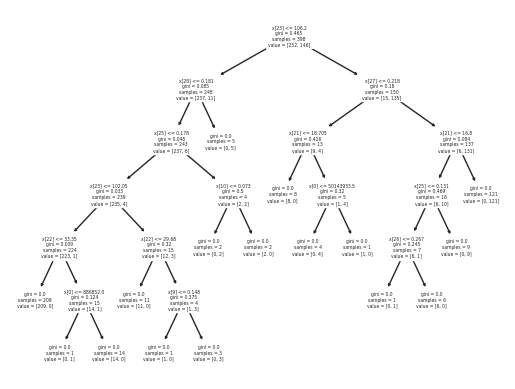

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

#— Confusion Matrix for DecisionTreeClassifier

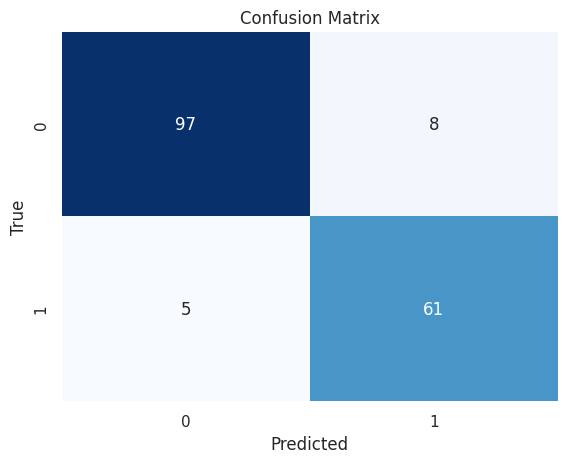

Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.92      0.94       105
           M       0.88      0.92      0.90        66

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into features (X) and labels (y)
X = breast_cancer_dataset.drop('diagnosis', axis=1)
y = breast_cancer_dataset['diagnosis']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Creating a decision tree classifier
classifier = DecisionTreeClassifier(criterion="gini")

# Fitting the classifier on the training data
classifier.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Let's break down each metric of the classification report. It provides a detailed evaluation of the performance on a dataset.

Precision: The ratio of correctly predicted positive observations to the total predicted positives.
Precision scores:
For class B (Benign) is 95%.
For class M (Malignant) is 88%.

Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in the actual class.
Recall scores:
For class B (Benign) is 92%, suggesting that the model identified 92% of the actual Benign cases.
For class M (Malignant) is 92%, indicating that the model identified 92% of the actual Malignant cases.

F1-Score: The harmonic mean of precision and recall (provides a balance).
F1-scores:
For class B (Benign) is 94%.
For class M (Malignant) is 90%.

Support: The number of actual occurrences of each class in the specified dataset.
For class B (Benign), there are 105 instances in the test set.
For class M (Malignant), there are 66 instances in the test set.

Accuracy: The ratio of correctly predicted observations to the total observations.
Overall accuracy is 92%

Macro Avg: Calculates metrics for each class independently and then takes the average.
Macro Avg Precision, Recall, and F1-score are all 92%

Weighted Avg:
Weighted average calculates metrics for each class independently and then takes the weighted average based on the number of instances of each class.
Weighted Avg Precision, Recall, and F1-score are all 92%

To conclude: The model has a good balance between precision and recall, and the weighted average metrics consider the class imbalance in the dataset. The high accuracy and balanced F1-scores suggest that the model performs well in distinguishing between Benign and Malignant cases.

# #11. Testing Algorithm #3 - Logistic Regression

Logistic Regression is a statistical method used for predicting probablility for classification problems. In our case it is predicting if the tumour is Malignant or Benign.

Now I'm using scikit-learn to train and evaluate a logistic regression classifier on the given breast cancer dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

breast_cancer_dataset = pd.read_csv('/content/drive/MyDrive/MSc_in_AI/Machine_Learning/breast-cancer-wisconsin.csv')

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(breast_cancer_dataset['diagnosis'])

X = breast_cancer_dataset[['area_worst', 'texture_worst', 'radius_worst', 'perimeter_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

# Using the encoded labels for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=33)

# Training the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

score = classifier.score(X_test, y_test)
print("Classifier Score:", score)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the results
print("\nClassification Report:")
print(classification_rep)

# Printing Accuracy
print("\nAccuracy:", accuracy)


Classifier Score: 0.935672514619883

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Accuracy: 0.935672514619883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Result:**

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. For both class the precision is 0.94. High precision relates to a low false positive rate.

**Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, recall is 0.96, and for class 1, recall is 0.89. High recall relates to a low false negative rate.

**F1-score:** The F1-score is the weighted average of precision and recall. It ranges from 0 to 1, where 1 is the best possible F1-score. For class 0, the F1-score is 0.95, and for class 1, it's 0.91.

**Support:** For class 0, the score is 105, and for class 1, it's 66.

**Accuracy:** The accuracy is approximately 93.56%. It indicates that the model correctly predicted the class labels for about 93.56% of the samples in the test set.

**Interpretation:**
The model is performing very well, with high precision, recall, and F1-score for both classes (0 and 1). The accuracy of around 93.56% indicates that the model is making correct predictions for the majority of the samples in the test set. The classification report also provides a more detailed view, showing the model's performance across precision, recall, and F1-score for each class.
The weighted average of precision, recall, and F1-score (weighted by the number of samples for each class) is also high, indicating robust performance across different classes.

**Conclusions:** The model appears to be effective and second best in predicting the target variable (diagnosis) on the test set, achieving high precision, recall, and F1-score for both classes.

#— Confusion Matrix for LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


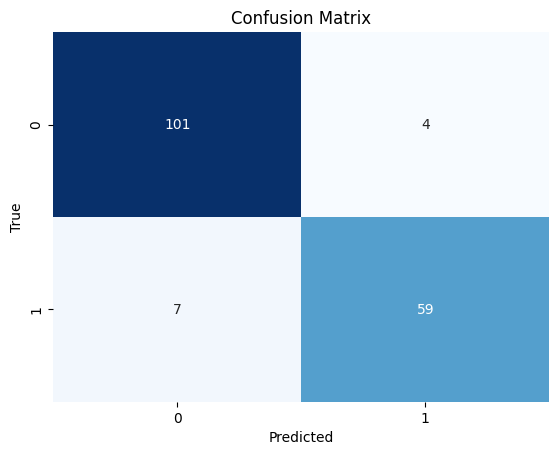

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=33)

# Training a logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Here's a report:**

True Positives (TP): 101. The model correctly predicted 101 instances of the positive class (Malignant).

False Negatives (FN): 7. The model incorrectly predicted 7 instances as the negative (Benign) when they were actually positive (Malignant).

False Positives (FP): 4. The model incorrectly predicted 4 instances as the positive (Malignant) when they were actually negative (Benign).

True Negatives (TN): 59. The model correctly predicted 59 instances of the negative class (Benign).

Precision = TP / (TP + FP) = 101 / (101 + 4) = 0.961 [indicating a high accuracy of the model when predicting Malignant cases.]

Recall = TP / (TP + FN) = 101 / (101 + 7) = 0.935 [ suggesting the model effectively identifies most of the actual Malignant cases.]

False Positive Rate (FPR): FPR = FP / (FP + TN) = 4 / (4 + 59) = 0.063. FPR measures the rate of false alarms or instances incorrectly predicted as positive. In this case, the FPR is approximately 6.3%.

Specificity (True Negative Rate): TN / (TN + FP) = 59 / (59 + 4) = 0.937. It is the ability of the model to correctly identify the negative class. In this case, the specificity is approximately 93.7%, indicating a high accuracy in predicting Benign cases.

The F1-Score is approximately 94.8%, indicating a balanced performance of the model.

The overall accuracy of the model is approximately 92.7%, demonstrating its effectiveness in correctly classifying instances. The model appears to be accurate, with high precision, recall, and F1-score for the Malignant class.

**Importance of False Negatives:**
In the evaluation of my classification model, the occurrence of false negatives is 7 times. The presence of false negatives is a cause for concern. False negatives are particularly critical in certain scenarios which could lead to  severe consequences, such as in medical diagnoses --- A false negative might mean failing to identify a disease or condition that may require prompt treatment.

 # #12. Test Algorithm #4 — Convolutional Neural Network (CNN)

 Building a Convolutional Neural Network (CNN) for breast cancer classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

breast_cancer_dataset = pd.read_csv('/content/drive/MyDrive/MSc_in_AI/Machine_Learning/breast-cancer-wisconsin.csv')

# Selecting only the shortlisted features
shortlisted_features = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
                         "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
                         "fractal_dimension_worst"]
breast_cancer_dataset_selected = breast_cancer_dataset[["diagnosis"] + shortlisted_features]

X = breast_cancer_dataset_selected.drop(['diagnosis'], axis=1)
y = breast_cancer_dataset_selected['diagnosis'].map({'M': 1, 'B': 0})  # Convert categorical labels to numerical

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshaping/Rescaling the input data for CNN
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], x_test_scaled.shape[1], 1))

# Creating a CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train_scaled.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train_reshaped, y_train, epochs=7, batch_size=32, validation_data=(x_test_reshaped, y_test))

# Evaluating the model
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/7
13/13 [==============================] - 8s 64ms/step - loss: 0.5101 - accuracy: 0.9020 - val_loss: 0.3769 - val_accuracy: 0.9591
Epoch 2/7
13/13 [==============================] - 0s 10ms/step - loss: 0.3080 - accuracy: 0.9296 - val_loss: 0.2377 - val_accuracy: 0.9649
Epoch 3/7
13/13 [==============================] - 0s 10ms/step - loss: 0.2009 - accuracy: 0.9397 - val_loss: 0.1736 - val_accuracy: 0.9708
Epoch 4/7
13/13 [==============================] - 0s 11ms/step - loss: 0.1450 - accuracy: 0.9497 - val_loss: 0.1491 - val_accuracy: 0.9708
Epoch 5/7
13/13 [==============================] - 0s 10ms/step - loss: 0.1127 - accuracy: 0.9623 - val_loss: 0.1366 - val_accuracy: 0.9708
Epoch 6/7
13/13 [==============================] - 0s 10ms/step - loss: 0.0930 - accuracy: 0.9698 - val_loss: 0.1318 - val_accuracy: 0.9766
Epoch 7/7
6/6 [==============================] - 0s 6ms/step - loss: 0.1307 - accuracy: 0.9825
Test Accuracy: 0.9824561476707458


**Conclusion:** With the test accuracy of 98.25% CNN is by far the best model for the classification of Breast Cancer Dataset.

#— A Confusion Matrix for the CNN Model
The confusion matrix will help in understanding how well my model is performing in terms of true positives, true negatives, false positives, and false negatives.

6/6 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       105
           1       0.98      0.97      0.98        66

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



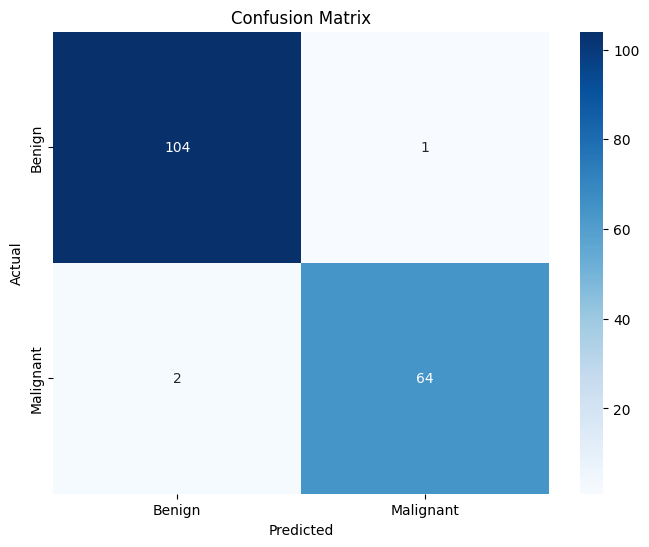

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making predictions on the test set
y_pred_probs = model.predict(x_test_reshaped)

# Converting probabilities to binary predictions (0 or 1)
y_pred = np.round(y_pred_probs).flatten()

# Flattening the true labels
y_test_flat = y_test.values.flatten()

# Creating a confusion matrix
cm = confusion_matrix(y_test_flat, y_pred)

# Printing the classification report
classification_rep = classification_report(y_test_flat, y_pred)
print("Classification Report:")
print(classification_rep)

# Plotting a confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Here's a brief explanation of the metrics:

**Precision:**
For both classes 0 (Benign) and 1 (Malignant): 98%, indicating that out of all predicted cases, 98% were correctly predicted.

**Recall:**
For class 0 (Benign) 99% of all actual Benign cases were correctly identified by the model.
For class 1 (Malignant): 97% were correctly identified.

**F1-score:**
For class 0 (Benign): 99%, representing a balanced performance of the model in predicting Benign cases.
For class 1 (Malignant): 98%, indicating a balanced performance in predicting Malignant cases.

**Support:**
For class 0 (Benign): 105 instances in the test set.
For class 1 (Malignant): 66 instances in the test set.

**Accuracy:**
Overall accuracy is 98%, meaning the model correctly predicted the class for 98% of instances in the test set.

#  #13. Comparison and Conclusion

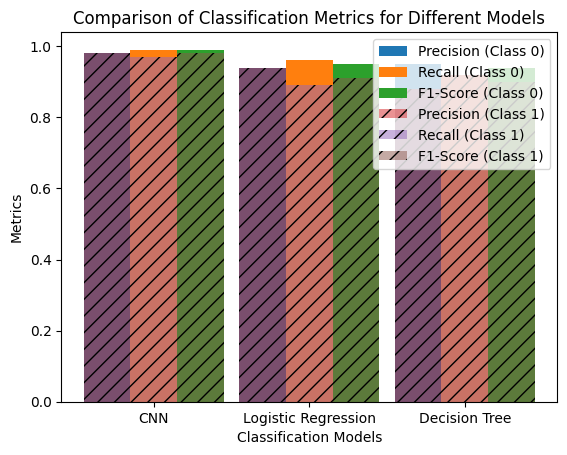

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification Results compared
models = ['CNN', 'Logistic Regression', 'Decision Tree']
precision_0 = [0.98, 0.94, 0.95]
recall_0 = [0.99, 0.96, 0.92]
f1_0 = [0.99, 0.95, 0.94]

precision_1 = [0.98, 0.94, 0.88]
recall_1 = [0.97, 0.89, 0.92]
f1_1 = [0.98, 0.91, 0.90]

#Defining Bar Width
bar_width = 0.3

# Setting position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating bar plots
plt.bar(r1, precision_0, width=bar_width, label='Precision (Class 0)')
plt.bar(r2, recall_0, width=bar_width, label='Recall (Class 0)')
plt.bar(r3, f1_0, width=bar_width, label='F1-Score (Class 0)')

plt.bar(r1, precision_1, width=bar_width, label='Precision (Class 1)', alpha=0.5, hatch='//')
plt.bar(r2, recall_1, width=bar_width, label='Recall (Class 1)', alpha=0.5, hatch='//')
plt.bar(r3, f1_1, width=bar_width, label='F1-Score (Class 1)', alpha=0.5, hatch='//')

# Adding labels to the chart
plt.xlabel('Classification Models')
plt.ylabel('Metrics')
plt.title('Comparison of Classification Metrics for Different Models')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Show the plot
plt.show()


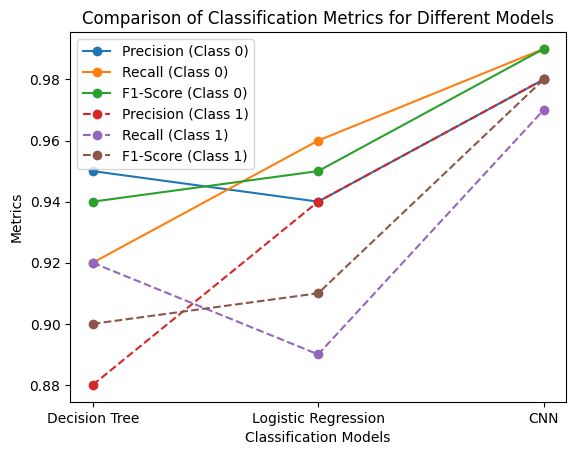

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification Reports Data
models = ['Decision Tree', 'Logistic Regression', 'CNN']
precision_0 = [0.95, 0.94, 0.98]
recall_0 = [0.92, 0.96, 0.99]
f1_0 = [0.94, 0.95, 0.99]

precision_1 = [0.88, 0.94, 0.98]
recall_1 = [0.92, 0.89, 0.97]
f1_1 = [0.90, 0.91, 0.98]

# Plotting lines for Class 0
plt.plot(models, precision_0, marker='o', label='Precision (Class 0)')
plt.plot(models, recall_0, marker='o', label='Recall (Class 0)')
plt.plot(models, f1_0, marker='o', label='F1-Score (Class 0)')

# Plotting lines for Class 1
plt.plot(models, precision_1, marker='o', linestyle='dashed', label='Precision (Class 1)')
plt.plot(models, recall_1, marker='o', linestyle='dashed', label='Recall (Class 1)')
plt.plot(models, f1_1, marker='o', linestyle='dashed', label='F1-Score (Class 1)')

# Add labels to the chart
plt.xlabel('Classification Models')
plt.ylabel('Metrics')
plt.title('Comparison of Classification Metrics for Different Models')
plt.legend()

# Show the plot
plt.show()


**Let's compare the accuracy scores of all algorigthms tested:**

Linear Regression Results: Algorightm not suitable.

Decision Tree Classifier was good with 91.81%

Logistic Regression was better with 93.56%

Convolutional Neural Network is best with 98.24%

**My Conclusion:**

The evaluation of various classification models on the Breast Cancer Dataset demonstrates that the Convolutional Neural Network (CNN) model/algorithm outperforms other models with a remarkable test accuracy of 98%. The CNN exhibits superior performance in distinguishing between benign and malignant cases, showcasing its effectiveness in handling the complex patterns present in the digitized images of fine needle aspirations of breast tissue masses. The robustness and accuracy of the CNN make it the optimal choice for the classification task, underscoring its potential as a powerful tool in the domain of breast cancer diagnosis and classification.

However, it is crucial to collaborate with domain experts, stakeholders, and end-users to align model performance with the specific requirements and implications of the application. Continuous monitoring and iterative improvements will contribute to refining the model's ability to accurately classify positive instances, thereby enhancing its overall effectiveness and reliability in real-world scenarios.